## Vision Unleashed: Exploring Image Classification with CIFAR-10 and Convolutional Neural Networks (CNN)

**Introduction:**<br>
In the dynamic landscape of computer vision, image classification serves as a cornerstone, offering a profound understanding of the visual world. In this blog, we embark on an exciting exploration of the CIFAR-10 project, a dataset comprising *60,000 32x32 color images across 10 distinct classes.* Our guide on this journey is the Convolutional Neural Network (CNN), a powerful deep learning architecture tailor-made for deciphering intricate visual patterns. Join us as we unravel the intricacies of the CIFAR-10 project and witness the transformative potential of CNNs in the realm of *image classification.*

In [6]:
# image => Kernel => feature map => Pooling => Pooled feaure map => flatten => Deep Neural 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import tensorflow as tf

**The Canvas of CIFAR-10:**<br>
Our journey begins with the CIFAR-10 dataset, a rich tapestry of 60,000 images spanning 10 classes, each containing 6,000 images. The dataset encompasses diverse objects, animals, and scenes, providing a vibrant canvas for our image classification project.

In [8]:
# Read Dataset
from tensorflow.keras.datasets import cifar10

In [9]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

In [10]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

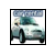

In [11]:
# diplay a random image
plt.figure(figsize=(0.45,0.45))
plt.imshow(x_train[40000])
plt.xticks([])
plt.yticks([])
plt.show()

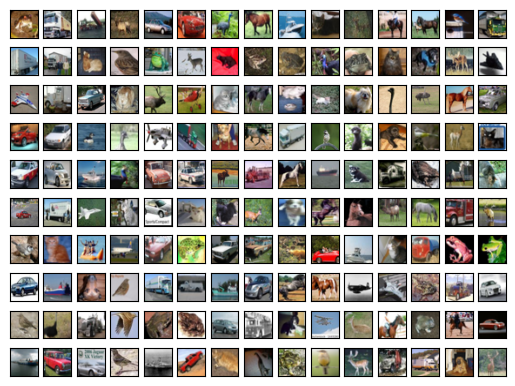

In [12]:
# Display first 150 images 

for i in range(150):
    plt.subplot(10, 15, i+1)  # rows cols, position
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])

**Preparing Dataset(Preprocessing):**<br>
Before unleashing the CNN, we delve into preprocessing steps to ensure our dataset is in optimal form. Resizing the images, normalizing pixel values, and encoding class labels are crucial steps in harmonizing the data for the deep neural network.

Data pre processing<br>
1. numerical : Normalisation
2. Categorical

In [13]:
x_train = x_train /255
x_test = x_test /255

In [14]:
# categorical data

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
ytrain = to_categorical(y_train, num_classes=10)
ytest = to_categorical(y_test, num_classes=10)

In [18]:
ytest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
# build a model CNN + DNN

**Crafting the Convolutional Neural Network:**<br>
The heart of our image classification project is the Convolutional Neural Network, a sophisticated architecture inspired by the human visual system. Comprising convolutional layers, pooling layers, and fully connected layers, the CNN is uniquely equipped to extract hierarchical features from images.

In [20]:
# 1. CNN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adagrad, Adam

In [22]:
# cnn model

model = Sequential()

# Layer1 :CNN
# Add 1st convo layer for kernel (3,3)
model.add(Conv2D(64, (3,3),strides=(1,1), input_shape=(32,32,3), activation='relu'))
# Add Pooling layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout layer
model.add(Dropout(rate=0.30))


# Layer 2 
# Add second convolutional layer 
model.add(Conv2D(32, (3,3), activation='relu'))
# Add Pooling layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.30))

# flatten the data
model.add(Flatten())


# Deep Neural Network
# Hidden layer 1 
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.30))

# hidden layer 2 
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(rate=0.30))

# outputlayer 
model.add(Dense(10, activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

In [24]:
# Compile the Model

model.compile(optimizer='Adam', loss = "categorical_crossentropy", metrics= ['accuracy'])

**Brush Strokes of Model Training:**<br>
The CNN is unleashed on the CIFAR-10 dataset, absorbing the nuances of each image class. The model undergoes training iterations, fine-tuning its parameters to recognize intricate patterns and features within the images.

In [25]:
# train the model 

result = model.fit(x_train, ytrain, epochs=5, validation_data= (x_test, ytest))

Epoch 1/5
1563/1563 [==============================] - 154s 95ms/step - loss: 1.5754 - accuracy: 0.4219 - val_loss: 1.2628 - val_accuracy: 0.5629
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.2561 - accuracy: 0.5531 - val_loss: 1.1216 - val_accuracy: 0.5991
Epoch 3/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.1102 - accuracy: 0.6108 - val_loss: 1.0287 - val_accuracy: 0.6398
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.0141 - accuracy: 0.6430 - val_loss: 0.9492 - val_accuracy: 0.6700
Epoch 5/5
1563/1563 [==============================] - 146s 94ms/step - loss: 0.9491 - accuracy: 0.6661 - val_loss: 0.8806 - val_accuracy: 0.6927


**Evaluation and Gallery Showcase:**<br>
The trained CNN is put to the test with the CIFAR-10 test dataset. We evaluate its performance using accuracy, precision, recall, and F1 score. The results showcase the model's ability to accurately classify images across diverse classes.

In [26]:
from PIL import Image 

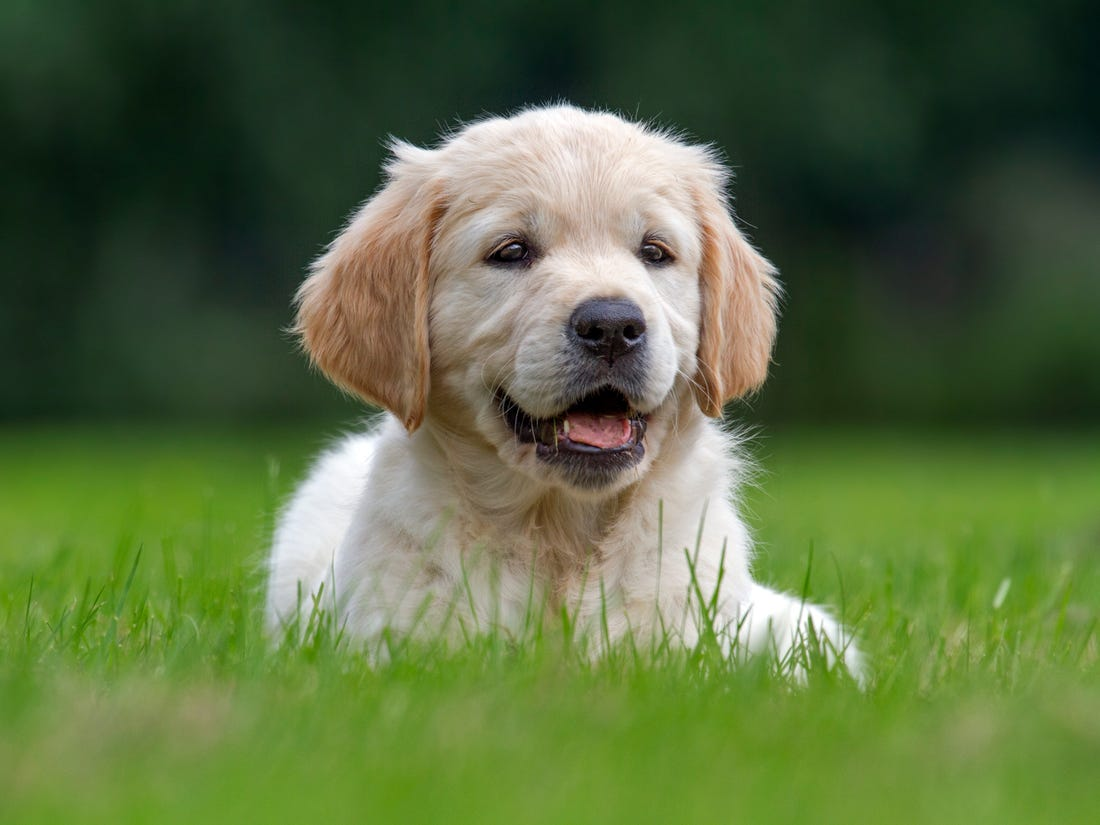

In [28]:
im = Image.open('dog.png')
im

In [29]:
im.size

(1100, 825)

In [30]:
im1 = im.resize([32,32])

In [31]:
im1 = np.expand_dims(im1, axis = 0)
im1.shape

(1, 32, 32, 3)

In [32]:
im1.shape

(1, 32, 32, 3)

In [33]:
result = model.predict(im1)
result

1/1 [==============================] - 0s 406ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [34]:
#  Labels 
classlabels= {0 :'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}


0.0

In [35]:
type(result)

numpy.ndarray

In [42]:
for i in range(0,10):
    if int(result[0][i]) == 1:
        print("The class of given image is", classlabels[i])

The class of given image is dog


**Conclusion:**<br>
The CIFAR-10 project with CNNs showcases the transformative power of deep learning in image classification. As we navigate the diverse classes and intricate details encoded in the images, CNNs emerge as visionary tools capable of understanding and categorizing visual content with remarkable accuracy. Beyond this project, the application of CNNs in computer vision spans diverse domains, from autonomous vehicles to medical imaging. The fusion of art and technology in image classification continues to shape the future of visual understanding, and CNNs stand as powerful brushes in this canvas of innovation.